In [42]:
import sys
sys.path.append( '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder, PowerTransformer, StandardScaler
  )
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
# read dataset
df = pd.read_csv("motionData.csv")
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.drop('time', axis = 1, inplace=True)
df = df[df["class"] != 0]
df

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,0.0000,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
1,0.0000,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
2,0.0000,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
3,0.0000,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
4,0.0000,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
...,...,...,...,...,...,...,...,...,...
44027,0.0002,-0.00016,-0.00002,0.00007,0.00048,0.00031,0.00002,-0.00013,6
44028,0.0002,-0.00016,-0.00002,0.00007,0.00048,0.00031,0.00002,-0.00013,6
44029,0.0002,-0.00016,-0.00002,0.00007,0.00048,0.00031,0.00002,-0.00013,6
44030,0.0002,-0.00016,-0.00002,0.00007,0.00048,0.00031,0.00002,-0.00013,6


In [56]:
pd.unique(df["class"])

array([1, 2, 3, 4, 5, 6])

Accuracy: 0.8457986373959122


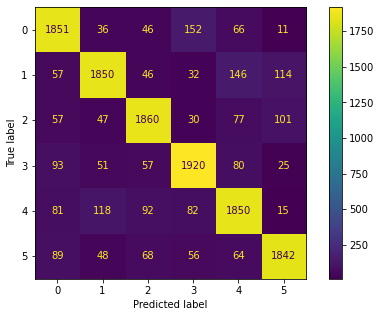

In [57]:
#Decision tree model 
# Build a synthetic dataset
X, y = make_classification(
    n_samples=44031, n_features=8, n_informative=7, n_redundant = 0, n_classes=6
)

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)

# Fit/predict
etc = ExtraTreesClassifier()
_ = etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
)

#Figure out how to plot learning curves
#sklearn.model_selection.learning_curve
#c parameter for regularization
cmp.plot(ax=ax)
plt.show()

In [64]:
#Decision tree metrics
y_preb_probs = etc.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("AUC:", metrics.roc_auc_score(y_test, y_preb_probs, average = 'weighted', multi_class = 'ovr'))
print("Kappa:",metrics.cohen_kappa_score(y_test, y_pred))

Accuracy: 0.8457986373959122
Precision: 0.8462302252337147
AUC: 0.9765102914221706
Kappa: 0.8149512396578047


In [33]:
dfsmall = df.iloc[0:30000]
dfsmall

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,0.0,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
1,0.0,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
2,0.0,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
3,0.0,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
4,0.0,0.00001,0.00000,0.00001,-0.00006,-0.00004,-0.00002,0.00000,1
...,...,...,...,...,...,...,...,...,...
29995,0.0,-0.00003,-0.00004,0.00004,0.00021,0.00001,0.00008,0.00003,0
29996,0.0,-0.00003,-0.00004,0.00004,0.00021,0.00001,0.00008,0.00003,0
29997,0.0,-0.00003,-0.00004,0.00004,0.00021,0.00001,0.00008,0.00003,0
29998,0.0,-0.00003,-0.00004,0.00004,0.00021,0.00001,0.00008,0.00003,0


In [35]:
#Linear SVC

y = df['class']
df.drop('class', axis = 1, inplace=True)
X = df
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf = svm.SVC(kernel='linear')


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5693300689962163
